In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [4]:
food = pd.read_csv('./Data/seogyodong+korean-ratio+franchise+hint.csv')
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,clustering
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1,0
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,0,0


### 상점데이터 다시 붙이기

In [5]:
shop = pd.read_csv('./Raw/서울시_우리마을가게_상권분석서비스(상권-점포)_2021년.csv',encoding='euc-kr')

In [6]:
for i in range(2014,2021):
    shop_temp = pd.read_csv(f'./Raw/서울시_우리마을가게_상권분석서비스(상권-점포)_{i}년.csv',encoding='euc-kr')
    shop = pd.concat([shop,shop_temp])

shop.shape

(2848231, 15)

In [7]:
shop=shop[['기준_년_코드', '기준_분기_코드','상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명','유사_업종_점포_수', '개업_율', '개업_점포_수',
       '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수']]

In [8]:
food=pd.merge(food,shop,on=['기준_년_코드', '기준_분기_코드','상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명'],how='left')

In [9]:
food=food.fillna(0)

In [10]:
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,clustering,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1,0,14.0,14.0,2.0,14.0,2.0,2.0
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0,0,3.0,0.0,0.0,0.0,0.0,0.0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0,0,3.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,0,0,6.0,17.0,1.0,0.0,0.0,0.0


In [ ]:
# 그 분기에 개업한 프랜차이즈 점포수를 알기 위해서는
# 일단 그전 분기의 프랜차이즈 점포수를 알아야 한다. 
# 빼서 늘었다면 그건 프랜차이즈 점포수가 늘었다는 것이다.

# 그러면 일단 기준년코드와 기준분기코드로 상권명 서비스 업종명으로 맞춰야 된다. 정렬을

In [17]:
food=food.sort_values(by=['기준_년_코드','기준_분기_코드'])
food=food.sort_values(by=['상권_코드_명','서비스_업종_코드_명'])

In [19]:
food.head(50)

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,clustering,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
24,2014,2,1000466,동교로17길,CS100008,분식전문점,63683118,6,0,0,0,6.0,0.0,0.0,0.0,0.0,0.0
30,2014,3,1000466,동교로17길,CS100008,분식전문점,64387581,6,0,0,0,6.0,0.0,0.0,0.0,0.0,0.0
36,2014,4,1000466,동교로17길,CS100008,분식전문점,87289216,6,0,0,0,5.0,20.0,1.0,40.0,2.0,0.0
43,2015,1,1000466,동교로17길,CS100008,분식전문점,73207963,5,0,0,0,5.0,0.0,0.0,0.0,0.0,0.0
49,2015,2,1000466,동교로17길,CS100008,분식전문점,86340803,5,0,0,0,5.0,0.0,0.0,0.0,0.0,0.0
59,2015,3,1000466,동교로17길,CS100008,분식전문점,92227686,5,0,0,0,5.0,0.0,0.0,0.0,0.0,0.0
61,2015,4,1000466,동교로17길,CS100008,분식전문점,93223549,5,0,0,0,5.0,0.0,0.0,0.0,0.0,0.0
70,2016,1,1000466,동교로17길,CS100008,분식전문점,111532163,6,0,0,0,6.0,17.0,1.0,0.0,0.0,0.0
75,2016,2,1000466,동교로17길,CS100008,분식전문점,114375755,5,0,0,0,5.0,0.0,0.0,20.0,1.0,0.0
82,2016,3,1000466,동교로17길,CS100008,분식전문점,59356079,5,0,0,0,5.0,0.0,0.0,0.0,0.0,0.0


In [20]:
food['이전_분기_프랜차이즈_점포_수']=food['프랜차이즈_점포_수'].shift(1)

In [36]:
food['개업_폐업_프랜차이즈_점포_수']=np.abs(food['프랜차이즈_점포_수'] - food['이전_분기_프랜차이즈_점포_수'])

In [37]:
# 2014년 2분기는 그냥 0으로 해야 될듯
food.loc[(food['기준_년_코드'] == 2014) & (food['기준_분기_코드'] == 2),'이전_분기_프랜차이즈_점포_수'] = 0
food.loc[(food['기준_년_코드'] == 2014) & (food['기준_분기_코드'] == 2),'개업_폐업_프랜차이즈_점포_수'] = 0

<AxesSubplot: xlabel='개업_폐업_프랜차이즈_점포_수', ylabel='분기당_매출_금액'>

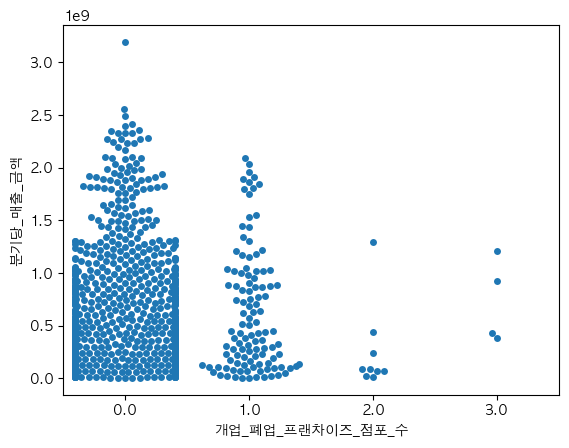

In [38]:
sns.swarmplot(
    x='개업_폐업_프랜차이즈_점포_수',
    y='분기당_매출_금액',
    data=food
)

In [39]:
food.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '점포수', '한식음식점여부', '프랜차이즈', 'clustering', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '이전_분기_프랜차이즈_점포_수',
       '개업_폐업_프랜차이즈_점포_수'],
      dtype='object')

In [52]:
food['점포수**3'] = food['점포수']**3
food['점포수**4'] = food['점포수']**4

food['로그점포수'] = np.log1p(food['점포수'])

In [78]:
feature = food[['점포수','로그점포수' ,'한식음식점여부', '프랜차이즈','개업_점포_수','폐업_점포_수','이전_분기_프랜차이즈_점포_수','점포수**4']]
target = food['분기당_매출_금액']

In [82]:
from module.default import basic
basic(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.7279865772444399
test :  0.5822381250967377
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.6458668271834802
test :  0.6329045690829137
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.6458472580639156
test :  0.6330027801354694
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.64586682718348
test :  0.6329045696158765
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.8770316456920438
test :  0.6396887220601917
--------------------------------------------------


In [84]:
food.to_csv('./Data/seogyodong+korean-ratio+franchise+hint+shop.csv',index=False)